# World Happiness Report Project

In [1]:
# 1st step : I import all the important Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Getting happines data csv file
df = pd.read_csv('Happiness dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# DATA PREPROCESSING :

In [3]:
# Checking the value counts for each region
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [4]:
# Encoding Catagorical column 'Region'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df = df
new_df['region'] = le.fit_transform(new_df['Region'])
new_df = new_df.drop(columns = ['Region'])
new_df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,8
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,8
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,4
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,8


In [5]:
new_df['region'].value_counts()

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: region, dtype: int64

In [5]:
# Checking the informations of the columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  region                         158 non-null    int32  
dtypes: float64(9), int32(1), int64(1), object(1)
memor

In [6]:
# Checking is there any null value is present !
new_df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
region                           0
dtype: int64

In [7]:
# Checking skewness and outlier by describing the dataset .
new_df.describe()
# I do not think that the outlier or skewness present in this dataset will affect it

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.120253
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,2.993321
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.000000
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,3.000000
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,4.500000
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,8.000000
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,9.000000


In [9]:
new_df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,9
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,9
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,9
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,9
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,5
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,8
154,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,8
155,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,4
156,Burundi,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,8


# DATA VISUALIZATION :

# first viewing some correlation between columns :

# 1. Economy ( GDP per Capita)

"\n** People who are  from the countries of 'Southern Asia (label : 7)', Though they have high 'Family'their 'Economy (GDP per Capita)' \n  is less  \n"

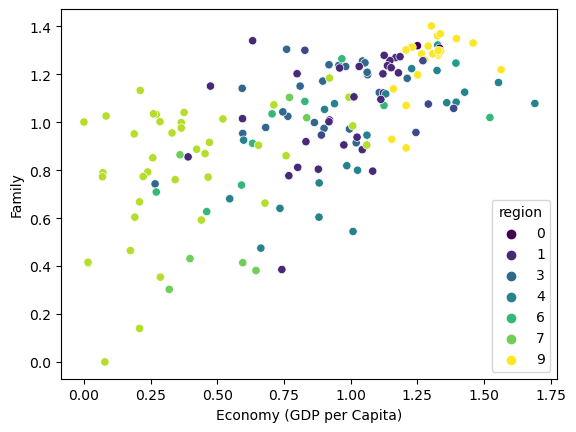

In [8]:
# Do 'Family' has any correlation with 'Economy (GDP per Capita)' ?
sns.scatterplot(data = new_df ,  x = 'Economy (GDP per Capita)', y = 'Family' , hue = 'region',palette="viridis")

#My Observation :
"""
** People who are  from the countries of 'Southern Asia (label : 7)', Though they have high 'Family'their 'Economy (GDP per Capita)' 
  is less  
"""


"\n** People who are  from the countries of 'Southern Asia (label : 7)',their 'Health (Life Expectancy)' is not according to their 'Economy (GDP per Capita)'\n   in most of the case .\n"

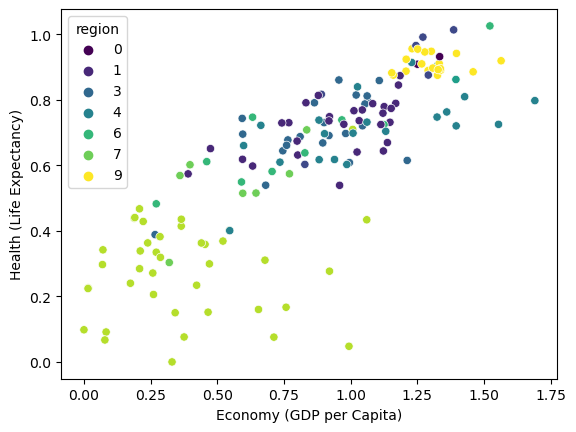

In [9]:
# Do 'Economy (GDP per Capita)' has any correlation with 'Health (Life Expectancy)' ?
sns.scatterplot(data = new_df ,  x = 'Economy (GDP per Capita)', y = 'Health (Life Expectancy)' , hue = 'region',palette="viridis")

#My Observation :
"""
** People who are  from the countries of 'Southern Asia (label : 7)',their 'Health (Life Expectancy)' is not according to their 'Economy (GDP per Capita)'
   in most of the case .
"""

"\n* In case of  'Southern Asia (label : 7)', The 'Economy (GDP per Capita)' is  less most of the time and 'Trust ( Government Corruption)' is also less most of the time\n* In case of the countries of  'Southeastern Asia(label : 6)',The 'Economy (GDP per Capita)' is  less most of the time and 'Trust ( Government Corruption)' is also less most of the time\n* In case of the countries of 'Latin America and Caribbean( label : 3)'and 'Middle East and Northern Africa( label : 4)',the economy is medium but Trust is less most of the time\n* In case of the countries of 'Central and Eastern Europe( label : 1)', the Economy is medium but Trust is very less\n* In case of the countries of 'Australia and New Zealand(label : 0)', Economy and Trust both are high.\n* In case of the countries of 'Western Europe(label : 9)', Economy is high but Trust is shaking.\n"

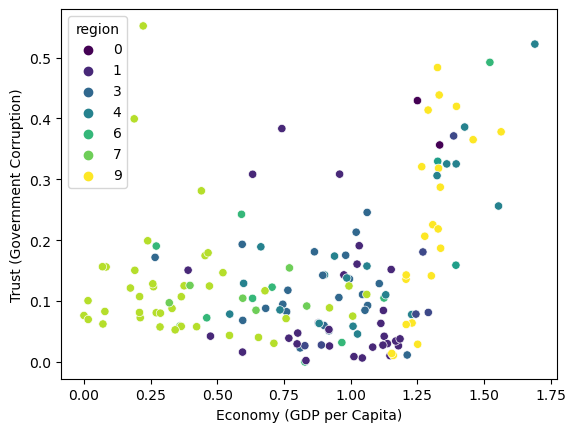

In [10]:
# Do 'Economy (GDP per Capita)' has any correlation with 'Trust (Government Corruption)' ?
sns.scatterplot(data = new_df ,  x = 'Economy (GDP per Capita)', y = 'Trust (Government Corruption)' , hue = 'region',palette="viridis")

#My Observation :
"""
* In case of  'Southern Asia (label : 7)', The 'Economy (GDP per Capita)' is  less most of the time and 'Trust ( Government Corruption)' is also less most of the time
* In case of the countries of  'Southeastern Asia(label : 6)',The 'Economy (GDP per Capita)' is  less most of the time and 'Trust ( Government Corruption)' is also less most of the time
* In case of the countries of 'Latin America and Caribbean( label : 3)'and 'Middle East and Northern Africa( label : 4)',the economy is medium but Trust is less most of the time
* In case of the countries of 'Central and Eastern Europe( label : 1)', the Economy is medium but Trust is very less
* In case of the countries of 'Australia and New Zealand(label : 0)', Economy and Trust both are high.
* In case of the countries of 'Western Europe(label : 9)', Economy is high but Trust is shaking.
"""



# 2. Family :

"\n* People who are  from the countries of  'Southern Asia (label : 7)',their 'Health (Life Expectancy)' is not according to their 'Family'\n\n* People who are from the countries of :\n    \n     'Western Europe(label : 9)', \n     'Australia and New Zealand ( label : 0)', \n     'Central and Eastern Europe(label : 1)',\n     'Latin America and Caribbean ( label : 3)' and\n     'Middle East and Northern Africa ( label : 4)' ,\n     \n           Their 'Helth(lift expectency)' and 'Family' is directly proportional\n"

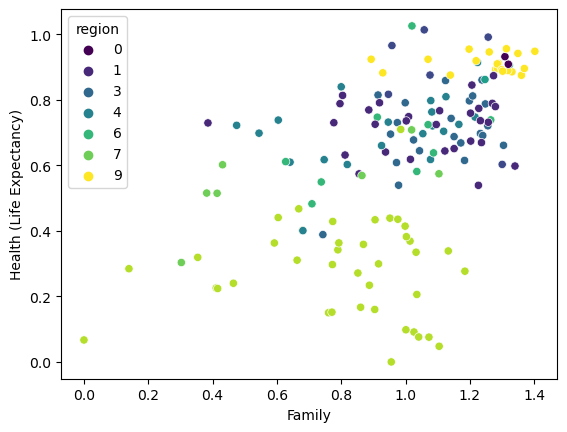

In [11]:
# Do "Family" has any correlation with 'Health (Life Expectancy)' ?
sns.scatterplot(data = new_df ,  x = 'Family', y = 'Health (Life Expectancy)' , hue = 'region',palette="viridis")
# Observation :
"""
* People who are  from the countries of  'Southern Asia (label : 7)',their 'Health (Life Expectancy)' is not according to their 'Family'

* People who are from the countries of :
    
     'Western Europe(label : 9)', 
     'Australia and New Zealand ( label : 0)', 
     'Central and Eastern Europe(label : 1)',
     'Latin America and Caribbean ( label : 3)' and
     'Middle East and Northern Africa ( label : 4)' ,
     
           Their 'Helth(lift expectency)' and 'Family' is directly proportional
"""

# 3 .Trust (Government Corruption)

<Axes: xlabel='Trust (Government Corruption)', ylabel='Generosity'>

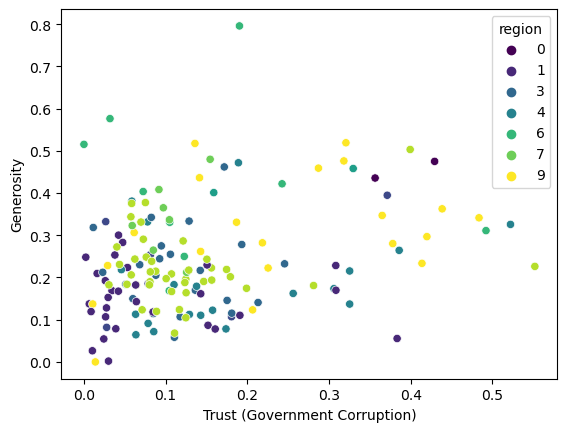

In [13]:
#1. Checking the relation of 'Trust (Government Corruption)' with the 'Generosity' with along with the region
sns.scatterplot(data = new_df ,  x = 'Trust (Government Corruption)', y = 'Generosity', hue = 'region' , palette = 'viridis' )

# Overall Visualization :

<Axes: xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

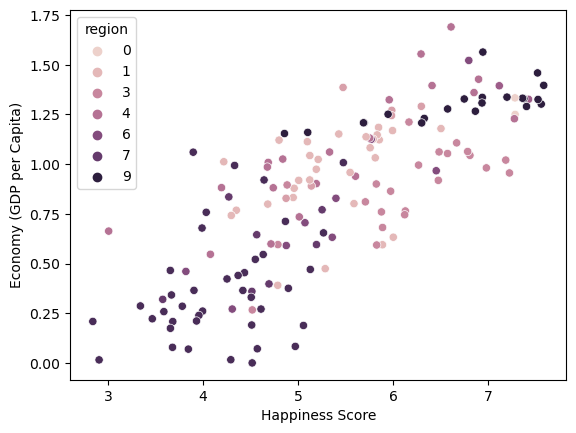

In [14]:
#1. Checking the relation of Economy (GDP per Capita) with the Happiness score with along with the region
sns.scatterplot(data = new_df ,  x = 'Happiness Score', y = 'Economy (GDP per Capita)', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Family'>

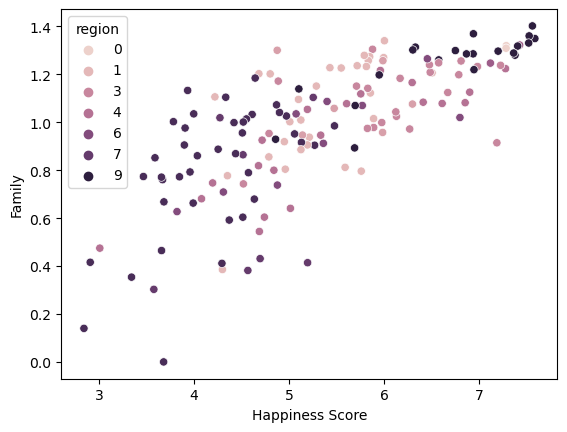

In [15]:
#2. Checking the relation of Family with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Family', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

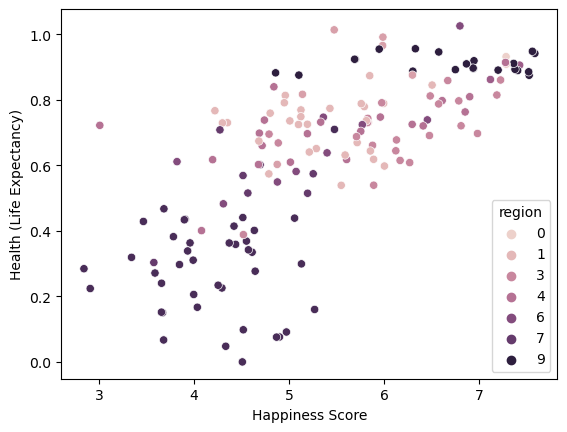

In [16]:
#3. Checking the relation of 'Health (Life Expectancy)' with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Health (Life Expectancy)', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Freedom'>

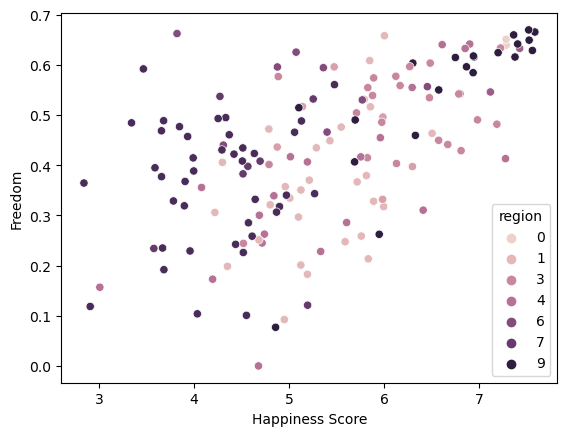

In [17]:
#4. Checking the relation of 'Freedom' with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Freedom', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

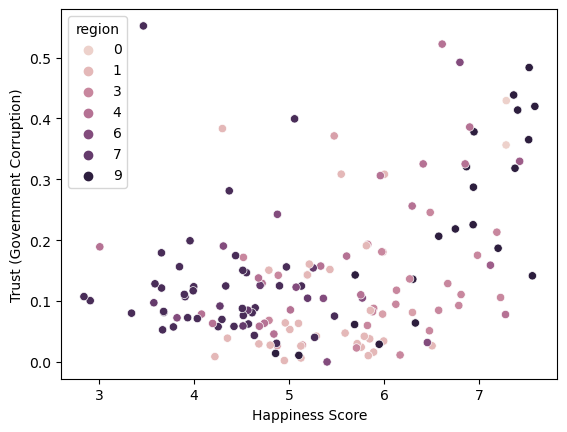

In [18]:
#6. Checking the relation of ''Trust (Government Corruption)'' with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Trust (Government Corruption)', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Generosity'>

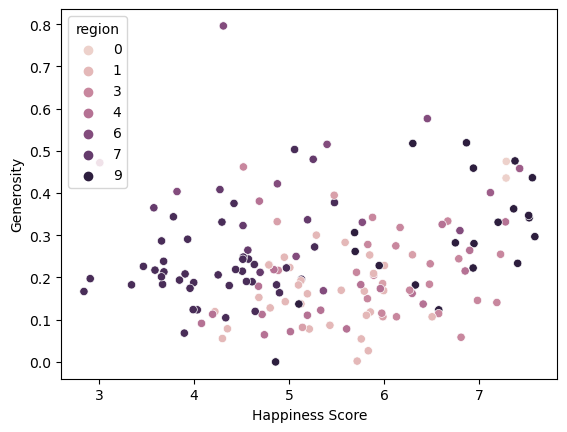

In [19]:
#7. Checking the relation of ''Generosity'' with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Generosity', hue = 'region' )

<Axes: xlabel='Happiness Score', ylabel='Dystopia Residual'>

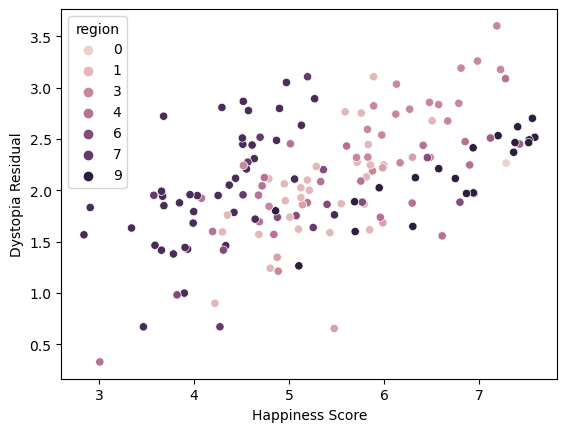

In [20]:
#8. Checking the relation of 'Dystopia Residual' with the Happiness score with along with the region
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Dystopia Residual', hue = 'region' )

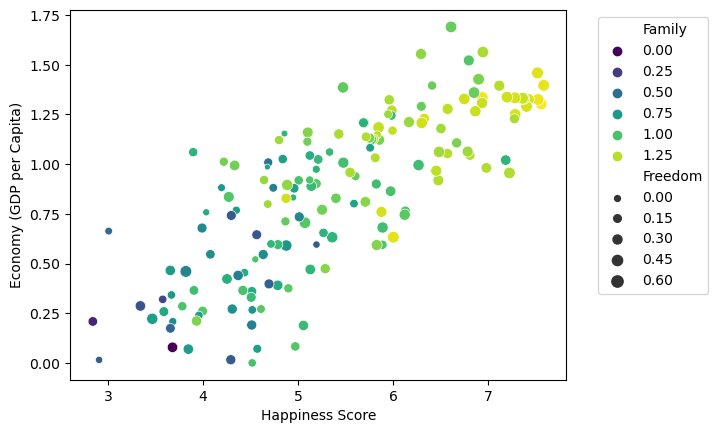

In [21]:
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Economy (GDP per Capita)', hue = 'Family' , size = 'Freedom',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

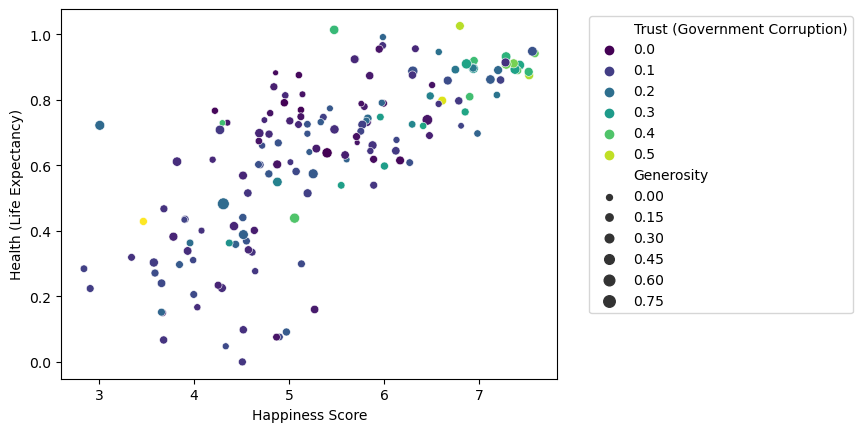

In [22]:
sns.scatterplot(data = new_df , x = 'Happiness Score', y = 'Health (Life Expectancy)', hue = 'Trust (Government Corruption)' , size = 'Generosity',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

In [23]:
# My observation from observed data :
"""
OBSERVATION : 1
-----------------

1. The Economy(GDP per Capital) is playing the most  important role in country's happiness
2. Family is playing an important role in country's happiness
3. Helth(life expectency) is playing an important role in country's happinesss
4. Freedom is not showing that much importance but little bit important
5. Trust is also not playing an  important role but more trust means more happiness I can say
6. Generocity is not playing very much importance

"""

"\nOBSERVATION : 1\n-----------------\n\n1. The Economy(GDP per Capital) is playing the most  important role in country's happiness\n2. Family is playing an important role in country's happiness\n3. Helth(life expectency) is playing an important role in country's happinesss\n4. Freedom is not showing that much importance but little bit important\n5. Trust is also not playing an  important role but more trust means more happiness I can say\n6. Generocity is not playing very much importance\n\n"

# Data Visualization for the Countries which happiness is below 4 :

In [24]:
below_4_df = new_df[new_df['Happiness Score'] < 4]
below_4_df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
137,Mali,138,3.995,0.05602,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293,8
138,Congo (Brazzaville),139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135,8
139,Comoros,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812,8
140,Uganda,141,3.931,0.04317,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766,8
141,Senegal,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395,8
142,Gabon,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895,8
143,Niger,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877,8
144,Cambodia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195,6
145,Tanzania,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,8
146,Madagascar,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100,8


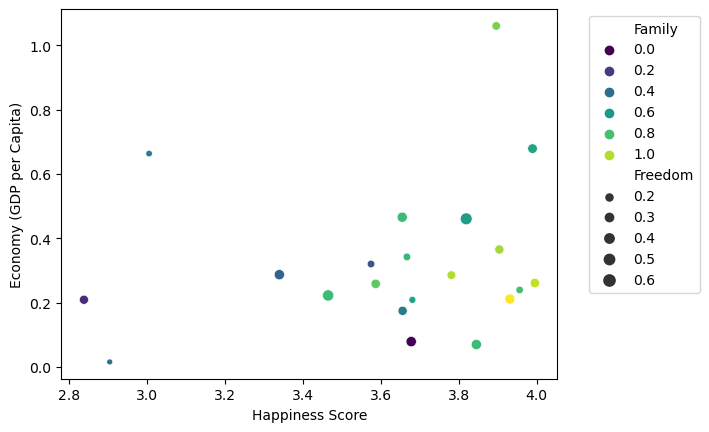

In [25]:
sns.scatterplot(data = below_4_df , x = 'Happiness Score', y = 'Economy (GDP per Capita)', hue = 'Family' , size = 'Freedom',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

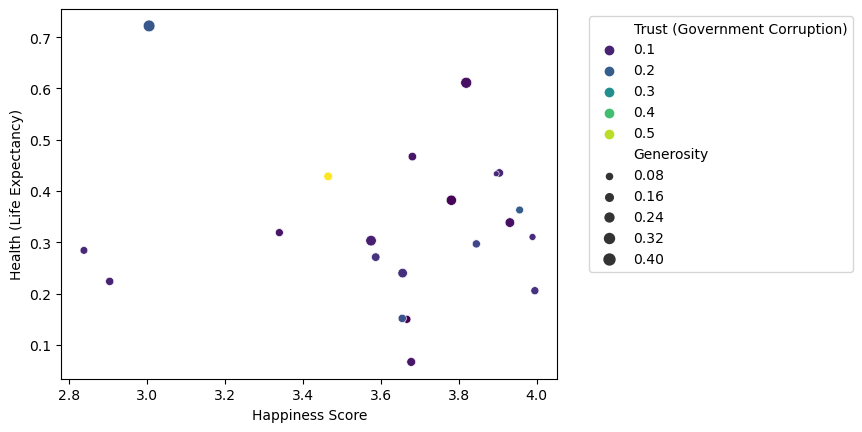

In [26]:
sns.scatterplot(data = below_4_df , x = 'Happiness Score', y = 'Health (Life Expectancy)', hue = 'Trust (Government Corruption)' , size = 'Generosity',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

In [27]:
# My observation :
"""
OBSERVATION : 2
-----------------
Countries which happiness below 4 :

Economy(GDP per Capital) : In most of the case less than 0.5 but in some cases greater than 0.5 also but chance is very less
Family : Less than 0.5
Health : Less than 0.5 , most of it is in the range between 0.3 - 0.5
Freedom : Freedom is quite good ! Less thn 0.7 . Most of it is between 0.3 -  0.5
Trust : In most of the case less than 0.2
Generocity : Less than 0.4

"""

'\nOBSERVATION : 2\n-----------------\nCountries which happiness below 4 :\n\nEconomy(GDP per Capital) : In most of the case less than 0.5 but in some cases greater than 0.5 also but chance is very less\nFamily : Less than 0.5\nHealth : Less than 0.5 , most of it is in the range between 0.3 - 0.5\nFreedom : Freedom is quite good ! Less thn 0.7 . Most of it is between 0.3 -  0.5\nTrust : In most of the case less than 0.2\nGenerocity : Less than 0.4\n\n'

# Data Visualization for the Countries which happiness is between 4 and 5 :

In [28]:
between_4_5_df = new_df[(new_df['Happiness Score'] >= 4) & (new_df['Happiness Score'] < 5)]
between_4_5_df

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
93,Mozambique,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,8
94,Albania,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,1
95,Bosnia and Herzegovina,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367,1
96,Lesotho,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,8
97,Dominican Republic,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305,3
98,Laos,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799,6
99,Mongolia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759,2
100,Swaziland,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676,8
101,Greece,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101,9
102,Lebanon,103,4.839,0.04337,1.02564,0.80001,0.83947,0.33916,0.04582,0.21854,1.57059,4


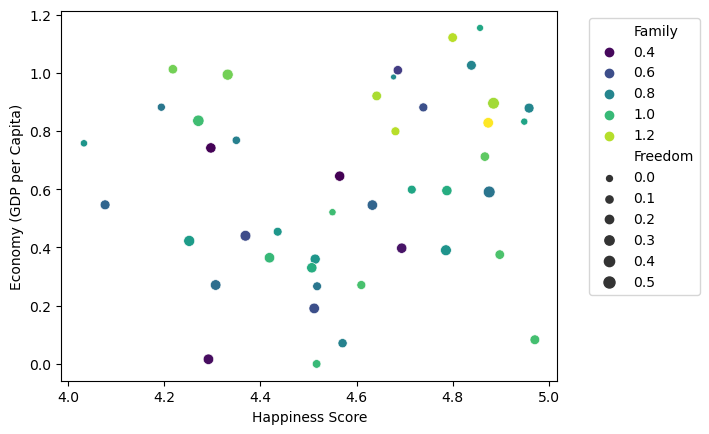

In [29]:
sns.scatterplot(data = between_4_5_df , x = 'Happiness Score', y = 'Economy (GDP per Capita)', hue = 'Family' , size = 'Freedom',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

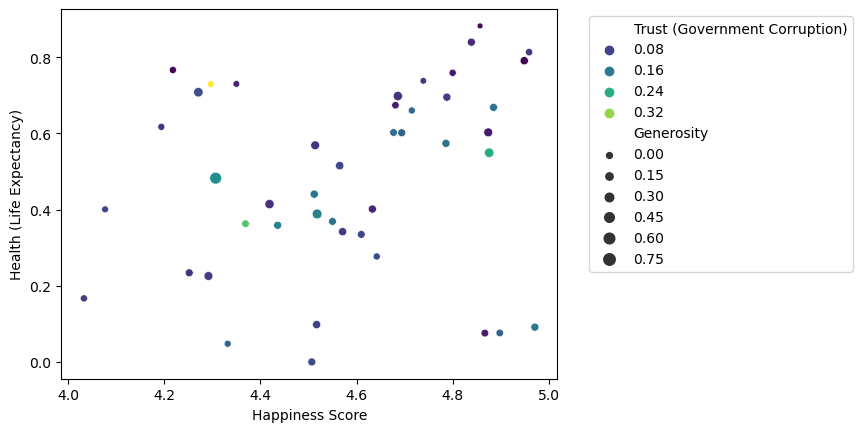

In [30]:
sns.scatterplot(data = between_4_5_df , x = 'Happiness Score', y = 'Health (Life Expectancy)', hue = 'Trust (Government Corruption)' , size = 'Generosity',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

In [31]:
# My observation :
"""
OBSERVATION : 3
-----------------
Countries which happiness between 4 and 5 :

Economy(GDP per Capital) : In most of the case , it is between 0.2 and 1.0
Family : Most of  the time in the range of 0.8 to 1.0
Health : Shaking between 0.0 to 0.8 most  of the time 
Freedom : Freedom is quite good !  Most of it is between 0.0 -  0.6
Trust : In most of the case less than 0.2
Generocity : most of the timeLess than 0.5

"""

'\nOBSERVATION : 3\n-----------------\nCountries which happiness between 4 and 5 :\n\nEconomy(GDP per Capital) : In most of the case , it is between 0.2 and 1.0\nFamily : Most of  the time in the range of 0.8 to 1.0\nHealth : Shaking between 0.0 to 0.8 most  of the time \nFreedom : Freedom is quite good !  Most of it is between 0.0 -  0.6\nTrust : In most of the case less than 0.2\nGenerocity : most of the timeLess than 0.5\n\n'

# Data Visualization for top 20 countries with highest happiness score  :

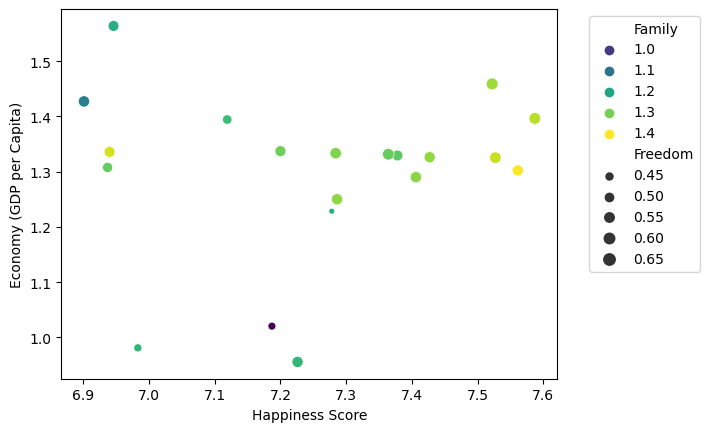

In [32]:
sns.scatterplot(data = new_df.head(20) , x = 'Happiness Score', y = 'Economy (GDP per Capita)', hue = 'Family' , size = 'Freedom',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

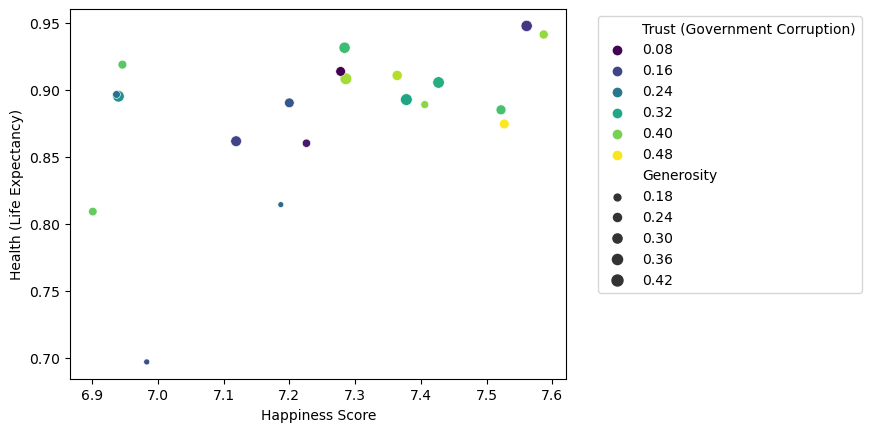

In [33]:
sns.scatterplot(data = new_df.head(20) , x = 'Happiness Score', y = 'Health (Life Expectancy)', hue = 'Trust (Government Corruption)' , size = 'Generosity',palette="viridis")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 10})
plt.show()

In [34]:
# My observation :
"""
OBSERVATION : 4
-----------------
Top 20 countries with highest happiness rank :

Economy(GDP per Capital) : In most of the case , it above 1.25
Family : Most of  the time , it is above 1.2
Health : In the range of 0.8 to 1.0 most  of the time 
Freedom :It is between 0.4 to 0.7 . Most of the time between 0.6 to 0.7
Trust : In most of time between 0.1 to 0.5
Generocity : Between 0.15 to 0.6

"""

'\nOBSERVATION : 4\n-----------------\nTop 20 countries with highest happiness rank :\n\nEconomy(GDP per Capital) : In most of the case , it above 1.25\nFamily : Most of  the time , it is above 1.2\nHealth : In the range of 0.8 to 1.0 most  of the time \nFreedom :It is between 0.4 to 0.7 . Most of the time between 0.6 to 0.7\nTrust : In most of time between 0.1 to 0.5\nGenerocity : Between 0.15 to 0.6\n\n'

# Using Different Mathematics Models :

In [35]:
X = new_df.drop(columns = ['Country','Happiness Rank','Happiness Score'])
y = new_df['Happiness Score']

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 42)

# 1. Linear Regression :

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.9999999392502191


In [40]:
"""
So , basically , Linear Regression is showing Overfitting.
"""

'\nSo , basically , Linear Regression is showing Overfitting.\n'

# 2. Polynomial Regression :

In [41]:
from  sklearn.preprocessing import PolynomialFeatures

In [42]:
PF = PolynomialFeatures()
X_train_poly = PF.fit_transform(X_train)
X_test_poly = PF.fit_transform(X_test)
lr.fit(X_train_poly , y_train)
y_pred_LRP = lr.predict(X_test_poly)
print('r2_score of Polynomial Regression :', r2_score(y_test , y_pred_LRP))

r2_score of Polynomial Regression : 0.9999998478740487


In [43]:
"""
So , basically , Polynomial Regression is showing Overfitting.
"""

'\nSo , basically , Polynomial Regression is showing Overfitting.\n'

# 3. Ridge Regression :

In [44]:
from sklearn.linear_model import Ridge

In [45]:
R = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 1 , 10],
    'solver': ['auto','svd','sag'],
}

grid_search = GridSearchCV(R, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_R = grid_search.best_estimator_.predict(X_test)

print('r2_score of Ridge Regression :', r2_score(y_test , y_pred_R))
print('best parameters :',grid_search.best_params_)

r2_score of Ridge Regression : 0.9999999357282189
best parameters : {'alpha': 0.001, 'solver': 'auto'}


In [46]:
"""
Ridge Regression is showing Overfitting.
"""

'\nRidge Regression is showing Overfitting.\n'

# 4. Lasso Regression :

In [47]:
from sklearn.linear_model import Lasso

In [48]:
L = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 1 , 10],
    'max_iter': [500, 1000],
}

grid_search = GridSearchCV(L, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_L = grid_search.best_estimator_.predict(X_test)

print('r2_score of Lasso Regression :', r2_score(y_test , y_pred_L))
print('best parameters :',grid_search.best_params_)

r2_score of Lasso Regression : 0.999901608648079
best parameters : {'alpha': 0.001, 'max_iter': 500}


In [49]:
"""
Lasso Regression is showing Overfitting.
"""

'\nLasso Regression is showing Overfitting.\n'

# 5. SGD Regression :

In [50]:
from sklearn.linear_model import SGDRegressor

In [51]:
SGD = SGDRegressor()

param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'alpha':[0.0001 ,0.001, 0.01 , 1],
    'max_iter': [500, 1000],
    'eta0':[0.001,0.01],
    
}

grid_search = GridSearchCV(SGD, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_SGD = grid_search.best_estimator_.predict(X_test)

print('r2_score of SGD Regression :', r2_score(y_test , y_pred_SGD))
print('best parameters :',grid_search.best_params_)

r2_score of SGD Regression : 0.9674040492494371
best parameters : {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 500, 'penalty': 'l1'}


In [52]:
"""
SGD regressor is also showing overfitting
"""

'\nSGD regressor is also showing overfitting\n'

# 6. KNN Regressor :

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors':[3,4,5,6,7],
    'weights':['uniform','distance'],
    'leaf_size': [10,20,30,40],
    
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_knn = grid_search.best_estimator_.predict(X_test)

print('r2_score of KNN Regression :', r2_score(y_test , y_pred_knn))
print('best parameters :',grid_search.best_params_)

r2_score of KNN Regression : 0.9156993743701435
best parameters : {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}


In [55]:
KNN = KNeighborsRegressor(n_neighbors = 1 , weights = 'uniform')
KNN.fit(X_train , y_train)
y_pred_KNN = KNN.predict(X_test)
print('r2_score of KNN Regression :', r2_score(y_test , y_pred_KNN))

r2_score of KNN Regression : 0.8804611979784182


In [56]:
"""
KNN Regressor is performing well !
"""

'\nKNN Regressor is performing well !\n'

# 7. Support Vactor Regressor :

In [57]:
from sklearn.svm import SVR

In [58]:
Svr = SVR()

param_grid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid',],
    'degree':[3,4,5],
    'gamma': ['scale', 'auto'],
    
}

grid_search = GridSearchCV(Svr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_Svr = grid_search.best_estimator_.predict(X_test)

print('r2_score of  SV Regression :', r2_score(y_test , y_pred_Svr))
print('best parameters :',grid_search.best_params_)

r2_score of  SV Regression : 0.9973772316743358
best parameters : {'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


In [59]:
svr = SVR(kernel='rbf', degree=3, gamma='scale')
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
print('r2_score of Support Vactor Regression :', r2_score(y_test , y_pred_svr))

r2_score of Support Vactor Regression : 0.8963983399372292


In [60]:
"""
SVR is performing good !
"""

'\nSVR is performing good !\n'

# 8. Decision Tree Regressor :

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dtr = DecisionTreeRegressor()
param_grid = {
    'max_depth': [3,4,5,6,7],
    'splitter':['best', 'random'],
    'min_samples_split': [2,4,6,8],
    
}

grid_search_dtr = GridSearchCV(dtr, param_grid, cv=5)
grid_search_dtr.fit(X_train, y_train)

y_pred_dtr = grid_search_dtr.best_estimator_.predict(X_test)

print("r2_score of Decision Tree Regressor :",r2_score(y_test, y_pred_dtr) )
print('best parameters :',grid_search_dtr.best_params_)

r2_score of Decision Tree Regressor : 0.8449553238505545
best parameters : {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'best'}


In [63]:
dt = DecisionTreeRegressor(splitter = 'best' , max_depth = 10 , min_samples_split = 8)
dt.fit(X_train , y_train)
y_pred_dt = dt.predict(X_test)
print('r2_score is :',r2_score(y_test , y_pred_dt))

r2_score is : 0.848487515852938


In [64]:
"""
DecisionTreeRegressor(dt) is giving an appropriate result.
"""

'\nDecisionTreeRegressor(dt) is giving an appropriate result.\n'

# 9. Random Forest Regressor :

In [85]:
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators':[100,300,500],
    'max_depth': [5,6,7,10],
    'min_samples_split': [2,4,6,8],
    
}

grid_search = GridSearchCV(rfr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred_rfr = grid_search.best_estimator_.predict(X_test)

print("r2_score of Random Forest Regressor :",r2_score(y_test, y_pred_rfr) )
print('best parameters :',grid_search.best_params_)

r2_score of Random Forest Regressor : 0.9141473674087057
best parameters : {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error',max_depth = 5 ,  min_samples_split=5)
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)
print('r2_score is :',r2_score(y_test , y_pred_rf))

r2_score is : 0.9105282927839591


In [66]:
"""
Random Forest is also Good !
"""

'\nRandom Forest is also Good !\n'

# 10. Gradient Boosting Regresor :

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 300 , max_depth = 1)
gb.fit(X_train , y_train)
y_pred_gb = rf.predict(X_test)
print('r2_score is :',r2_score(y_test , y_pred_gb))

r2_score is : 0.9105282927839591


In [68]:
"""
Gradient Boosting Regressor is also giving Good Result .
"""

'\nGradient Boosting Regressor is also giving Good Result .\n'

# 11. XGBoost :

In [69]:
import xgboost as xgb
dtrain = xgb.DMatrix( X_train, label= y_train)
params = {
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'silent': 1
}

# Train the model
model = xgb.train(params,dtrain , num_boost_round=100)

In [70]:
y_pred_xgb = model.predict(xgb.DMatrix( X_test, label= y_test))
print(r2_score(y_test , y_pred_xgb.round()))

0.879827833679782


In [71]:
"""
XGBoost result  is also Good .
"""

'\nXGBoost result  is also Good .\n'

# 12. Voting Regressor :

In [72]:
from sklearn.ensemble import VotingRegressor

In [73]:
Voting_rgr = VotingRegressor(
   estimators = [
       ('dtr', DecisionTreeRegressor(max_depth= 5)),
       ('rfr', RandomForestRegressor(n_estimators=100,  max_depth= 5)),
       ('gbr',GradientBoostingRegressor(n_estimators=100, max_depth=1))
   ]
)

In [74]:
Voting_rgr.fit(X_train , y_train)
pred_Voting = Voting_rgr.predict(X_test)
print(r2_score(y_test , pred_Voting))

0.9331367980793964


In [75]:
"""
Little bit of OverFitting is there 
"""

'\nLittle bit of OverFitting is there \n'

# 13 . Stacking Regressor :

In [76]:
from sklearn.ensemble import StackingRegressor

In [77]:
stacking_rgr = StackingRegressor(
   estimators = [
       ('KNN',KNeighborsRegressor(n_neighbors = 1 , weights = 'uniform')),
       ('dtr', DecisionTreeRegressor(max_depth= 5)),
       ('rfr', RandomForestRegressor(n_estimators=100,  max_depth= 5)),
       ('gbr',GradientBoostingRegressor(n_estimators=100, max_depth=1))
   ],
   final_estimator = RandomForestRegressor(n_estimators=300,  max_depth= 5),
   cv = 5
)


In [78]:
stacking_rgr.fit(X_train , y_train)
pred_rgr = stacking_rgr.predict(X_test)
print(r2_score(y_test , pred_rgr))

0.9410576966750103


In [79]:
"""
Overfitting is there in Stacking Regressor
"""

'\nOverfitting is there in Stacking Regressor\n'

In [80]:
"""
Analysing all the models , I would go for KNN
"""

'\nAnalysing all the models , I would go for KNN\n'

In [81]:
def Country_happiness_Prediction(p):

  p = p.reshape(1, -1)
  pred = KNN.predict(p)
  print('The Happiness score of the Country is:', pred)


In [83]:
p = np.array([0.02799,	1.32944,	1.28017,	0.89284,	0.61576,	0.31814,	0.47610,	2.46570,	9])
Country_happiness_Prediction(p)

The Happiness score of the Country is: [7.378]


In [132]:
new_df.sample(10)

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,region
6,Netherlands,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,9
109,Iran,110,4.686,0.04449,1.00880,0.54447,0.69805,0.30033,0.05863,0.38086,1.69440,4
106,Tunisia,107,4.739,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466,4
16,Luxembourg,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961,9
43,Uzbekistan,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,1
51,Moldova,52,5.889,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712,1
97,Dominican Republic,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305,3
49,Italy,50,5.948,0.03914,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518,9
57,Peru,58,5.824,0.04615,0.90019,0.97459,0.73017,0.41496,0.05989,0.14982,2.59450,3
23,Singapore,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501,6
